In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

sympy.init_printing()

In [2]:
t, r, theta, phi, phi_tilde = sympy.symbols("t r theta phi \\tilde{\phi}")

In [3]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

In [9]:
dt, dr, dtheta, dphi, dphi_tilde, dr_tilde = sympy.symbols(r"dt dr d\theta d\phi d\tilde{\phi} d\tilde{r}")

In [5]:
a, r_tilde_plus, delta = sympy.symbols("a \\tilde{r}_+ \delta")

In [6]:
tau, dtau = sympy.symbols("tau d\\tau")

In [12]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig += W * dr_tilde ** 2 / delta_r
metric_orig

In [13]:
dt_val = sympy.I * dtau

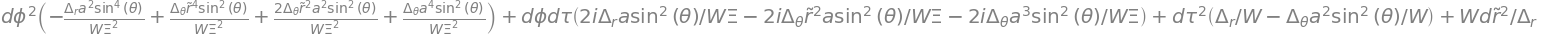

In [14]:
euclidean_metric = metric_orig.subs({dt: dt_val}).expand().collect([dtau ** 2, dtau * dphi, dphi ** 2])
euclidean_metric

In [15]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde + omega * dt_val
dphi_val

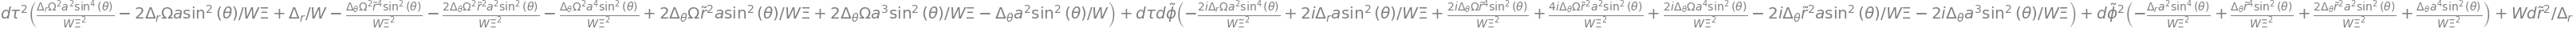

In [16]:
euclidean_metric_2 = euclidean_metric.subs({dphi: dphi_val}).expand().collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric_2

In [17]:
metric_list_matrix = [[0 for i in range(3)] for i in range(3)]

# tau
metric_list_matrix[0][0] = euclidean_metric_2.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_2.coeff(dtau * dr_tilde) / 2
metric_list_matrix[0][2] = euclidean_metric_2.coeff(dtau * dphi_tilde) / 2

# r_tilde
metric_list_matrix[1][0] = euclidean_metric_2.coeff(dr_tilde * dtau) / 2
metric_list_matrix[1][1] = euclidean_metric_2.coeff(dr_tilde ** 2)
metric_list_matrix[1][2] = euclidean_metric_2.coeff(dr_tilde * dphi_tilde) / 2

# phi_tilde
metric_list_matrix[2][0] = euclidean_metric_2.coeff(dphi_tilde * dtau) / 2
metric_list_matrix[2][1] = euclidean_metric_2.coeff(dphi_tilde * dr_tilde) / 2
metric_list_matrix[2][2] = euclidean_metric_2.coeff(dphi_tilde ** 2)

In [18]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat.simplify()
g_mat

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ────────────────────────────────

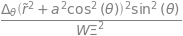

In [76]:
g_mat.det().simplify()

### Generic Metric

In [284]:
A, B, C, D, E, F = sympy.symbols("A B C D E F")

In [285]:
g_mat_simp = sympy.Matrix([[A + sympy.I * B, C + sympy.I * D], [C + sympy.I * D, E + sympy.I * F]])
g_mat_simp

⎡A + ⅈ⋅B  C + ⅈ⋅D⎤
⎢                ⎥
⎣C + ⅈ⋅D  E + ⅈ⋅F⎦

In [287]:
g_mat_simp.det().simplify().collect(sympy.I)

In [290]:
C_sol = sympy.solve(A * F + B * E - 2 * C * D, C)[0]
C_sol

In [131]:
sympy.fraction((A * E - B * F - C ** 2 + D ** 2).subs({C: C_sol}).expand().simplify())[0]

In [138]:
4 * D ** 2 * (A * E - B * F + D ** 2) - (A * F + B * E) ** 2

In [294]:
(sympy.fraction((A * E - B * F - C ** 2 + D ** 2).subs({C: C_sol}).expand().simplify())[0] - (4 * D ** 2 * (A * E - B * F + D ** 2) - (A * F + B * E) ** 2)).simplify()

In [83]:
g_mat_real_simp = sympy.Matrix([[A, C], [C, E]])
g_mat_real_simp

⎡A  C⎤
⎢    ⎥
⎣C  E⎦

In [181]:
g_mat_imag_simp = sympy.Matrix([[B, D], [D, F]])
g_mat_imag_simp

⎡B  D⎤
⎢    ⎥
⎣D  F⎦

In [84]:
g_mat_real_simp.eigenvals()

In [144]:
((A + E) ** 2 / 4 - (C ** 2 + (A - E) ** 2 / 4)).simplify()

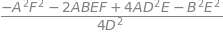

In [315]:
(A * E - C ** 2).subs({C: C_sol}).expand().simplify()

In [316]:
4 * A * E * D ** 2 - (A * F + B * E) ** 2

In [295]:
g_mat_simp.eigenvals()

In [99]:
list(g_mat_simp.eigenvals().keys())[0].args[2].args[1].args[0].simplify().expand().collect(sympy.I)

In [108]:
real_part_discrim = (A - E) ** 2 - (B - F) ** 2 + 4 * (C ** 2 - D ** 2)
real_part_discrim

In [109]:
imag_part_discrim = 2 * ((A - E) * (B - F) + 4 * C * D)
imag_part_discrim

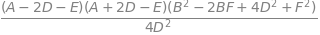

In [115]:
real_part_discrim.subs({C: sympy.solve(imag_part_discrim, C)[0]}).expand().simplify().factor()

### Generic Metric Inverse

In [300]:
g_mat_simp_inv = g_mat_simp.inv()
g_mat_simp_inv.simplify()
g_mat_simp_inv

⎡                   E + ⅈ⋅F                                        -C - ⅈ⋅D   
⎢─────────────────────────────────────────────  ──────────────────────────────
⎢                             2              2                               2
⎢A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C  - 2⋅ⅈ⋅C⋅D + D   A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C 
⎢                                                                             
⎢                   -C - ⅈ⋅D                                       A + ⅈ⋅B    
⎢─────────────────────────────────────────────  ──────────────────────────────
⎢                             2              2                               2
⎣A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C  - 2⋅ⅈ⋅C⋅D + D   A⋅E + ⅈ⋅A⋅F + ⅈ⋅B⋅E - B⋅F - C 

               ⎤
───────────────⎥
              2⎥
 - 2⋅ⅈ⋅C⋅D + D ⎥
               ⎥
               ⎥
───────────────⎥
              2⎥
 - 2⋅ⅈ⋅C⋅D + D ⎦

In [302]:
denom = g_mat_simp_inv[0, 0].args[0].args[0].collect(sympy.I)
denom

In [303]:
denom_conj = A * E - B * F - C ** 2 + D ** 2 - sympy.I * (A * F + B * E - 2 * C * D)
denom_conj

In [204]:
(denom * denom_conj).expand().simplify().factor()

In [304]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]

metric_list_matrix[0][0] = ((E + sympy.I * F) * denom_conj).expand().simplify().collect(sympy.I)
metric_list_matrix[0][1] = ((-C - sympy.I * D) * denom_conj).expand().simplify().collect(sympy.I)
metric_list_matrix[1][0] = ((-C - sympy.I * D) * denom_conj).expand().simplify().collect(sympy.I)
metric_list_matrix[1][1] = ((A + sympy.I * B) * denom_conj).expand().simplify().collect(sympy.I)

g_mat_simp_inv = sympy.Matrix(metric_list_matrix)
g_mat_simp_inv

⎡        2      2    2                2       ⎛     2      2    2             
⎢     A⋅E  + A⋅F  - C ⋅E - 2⋅C⋅D⋅F + D ⋅E + ⅈ⋅⎝- B⋅E  - B⋅F  - C ⋅F + 2⋅C⋅D⋅E 
⎢                                                                             
⎢                                  3      2     ⎛                             
⎣-A⋅C⋅E - A⋅D⋅F + B⋅C⋅F - B⋅D⋅E + C  + C⋅D  + ⅈ⋅⎝A⋅C⋅F - A⋅D⋅E + B⋅C⋅E + B⋅D⋅F

   2  ⎞                                          3      2     ⎛               
+ D ⋅F⎠        -A⋅C⋅E - A⋅D⋅F + B⋅C⋅F - B⋅D⋅E + C  + C⋅D  + ⅈ⋅⎝A⋅C⋅F - A⋅D⋅E +
                                                                              
    2      3⎞        2        2      2    2                 ⎛   2             
 - C ⋅D - D ⎠       A ⋅E - A⋅C  + A⋅D  + B ⋅E - 2⋅B⋅C⋅D + ⅈ⋅⎝- A ⋅F + 2⋅A⋅C⋅D 

                  2      3⎞⎤
 B⋅C⋅E + B⋅D⋅F - C ⋅D - D ⎠⎥
                           ⎥
   2        2      2⎞      ⎥
- B ⋅F - B⋅C  + B⋅D ⎠      ⎦

In [309]:
id = g_mat_simp_inv @ g_mat_simp / (denom * denom_conj)
id.simplify()
id

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [307]:
g_mat_real_simp_inv = [
    [A * E ** 2 + A * F ** 2 - C ** 2 * E - 2 * C * D * F + D ** 2 * E, -A * C * E - A * D * F + B * C * F - B * D * E + C ** 3 + C * D ** 2],
    [-A * C * E - A * D * F + B * C * F - B * D * E + C ** 3 + C * D ** 2, A ** 2 * E - A * C ** 2 + A * D ** 2 + B ** 2 * E - 2 * B * C * D]
]
g_mat_real_simp_inv = sympy.Matrix(g_mat_real_simp_inv)
g_mat_real_simp_inv

⎡      2      2    2                2                                         
⎢   A⋅E  + A⋅F  - C ⋅E - 2⋅C⋅D⋅F + D ⋅E      -A⋅C⋅E - A⋅D⋅F + B⋅C⋅F - B⋅D⋅E + 
⎢                                                                             
⎢                                  3      2      2        2      2    2       
⎣-A⋅C⋅E - A⋅D⋅F + B⋅C⋅F - B⋅D⋅E + C  + C⋅D      A ⋅E - A⋅C  + A⋅D  + B ⋅E - 2⋅

 3      2⎤
C  + C⋅D ⎥
         ⎥
         ⎥
B⋅C⋅D    ⎦

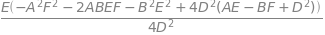

In [308]:
g_mat_real_simp_inv[0, 0].subs({C: C_sol}).expand().simplify()

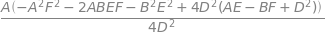

In [227]:
g_mat_real_simp_inv[1, 1].subs({C: C_sol[0]}).expand().simplify()

In [191]:
g_mat_real_simp_inv.eigenvals()

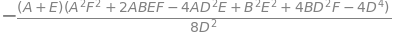

In [312]:
sum(list(g_mat_real_simp_inv.eigenvals().keys())[0].args[1:]).subs({C: C_sol}).factor()

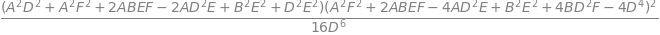

In [313]:
(-2 * list(g_mat_real_simp_inv.eigenvals().keys())[0].args[0]).args[0].subs({C: C_sol}).factor()

In [278]:
(D ** 2 * (A + E) ** 2 - D ** 2 * (A - E) ** 2 - (A * F + B * E) ** 2).expand().simplify()

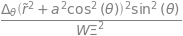

In [52]:
g_mat.det().simplify()

In [32]:
g_mat.inv()

⎡                                             2    2                        4 
⎢                                     - Δᵣ⋅W⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅W⋅\tilde{r}  
⎢   ──────────────────────────────────────────────────────────────────────────
⎢                      4                        2  2    2                     
⎢   Δᵣ⋅Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δᵣ⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a ⋅sin (θ) + 2⋅Δᵣ⋅Δₜₕₑₜₐ⋅\ti
⎢                                                                             
⎢                                                                             
⎢                                                                            0
⎢                                                                             
⎢                                                                             
⎢          2    2                                         4                   
⎢ⅈ⋅Δᵣ⋅Ω⋅W⋅a ⋅sin (θ) - ⅈ⋅Δᵣ⋅W⋅Ξ⋅a - ⅈ⋅Δₜₕₑₜₐ⋅Ω⋅W⋅\tilde{r}  - 2⋅ⅈ⋅Δₜₕₑₜₐ⋅Ω⋅W⋅\
⎢───────────────────────────────────────────────────

In [20]:
eigs = g_mat.inv().eigenvals()

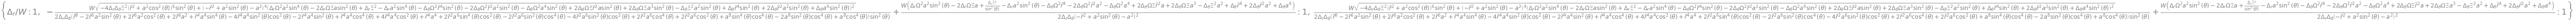

In [21]:
eigs

In [24]:
list(eigs.keys())[2]

In [25]:
eigs_2 = g_mat.eigenvals()

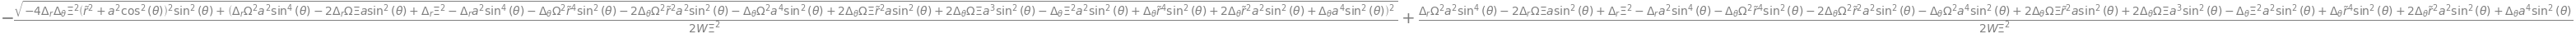

In [27]:
list(eigs_2.keys())[0]

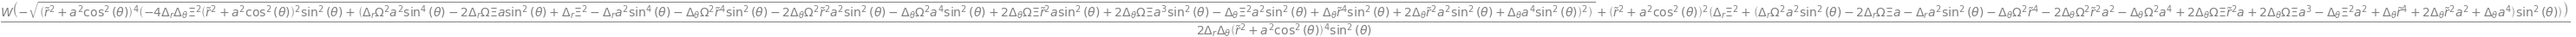

In [29]:
list(eigs.keys())[0].simplify()

In [31]:
list(eigs.keys())[2]